In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker

import os
import sys 
sys.path.append("../src")
from Fitness.ORCH import Calculate_ORCH


In [8]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D"
flag_output= True

species = list(data.keys())


data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimA.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimB.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [3]:
Err_R, Err_Reduced_Species ,Err_Reduced_Species_Coef = Calculate_ORCH(data_d,data_r,data,main_path,flag_output)
Err_A, Err_OptimA_Species ,Err_OptimA_Species_Coef = Calculate_ORCH(data_d,data_o,data,main_path,flag_output)
Err_B, Err_OptimB_Species ,Err_OptimB_Species_Coef = Calculate_ORCH(data_d,data_ob,data,main_path,flag_output)

Err ORCH = 2.66e+08
Err ORCH = 1.02e+08
Err ORCH = 4.56e+09


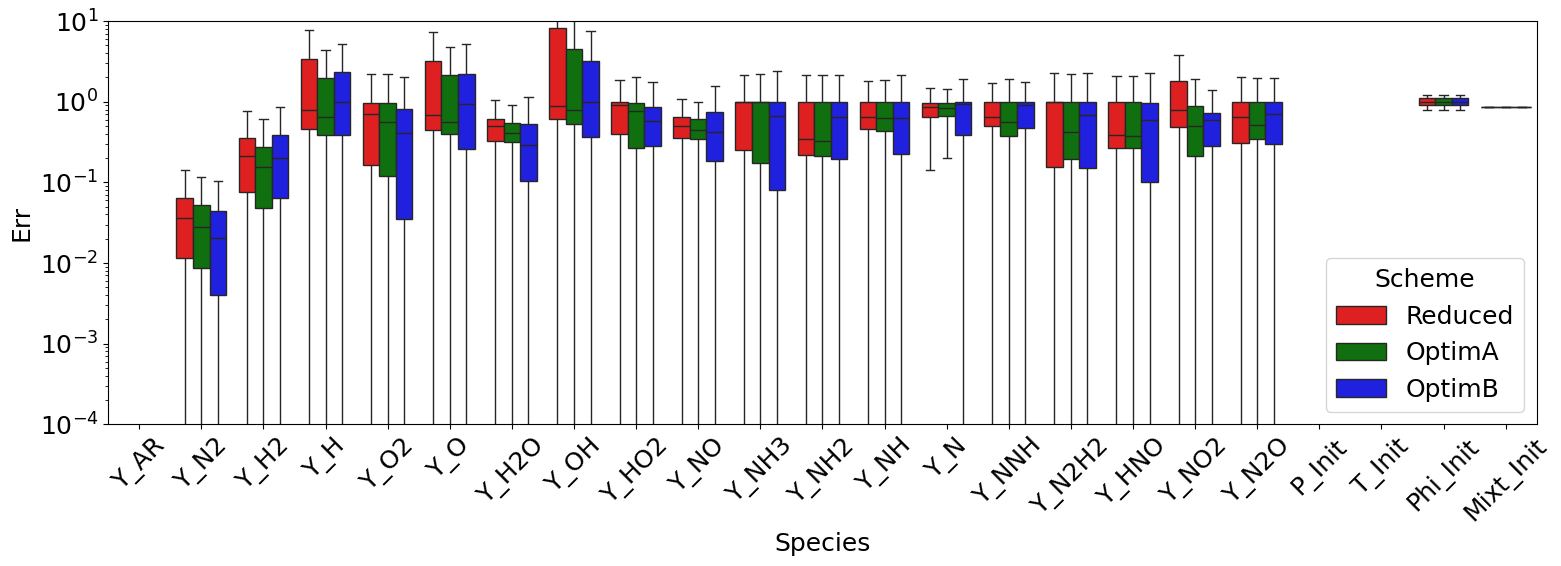

In [4]:
df_reduced = Err_Reduced_Species.melt(var_name="Species", value_name="Err")
df_reduced["Scheme"] = "Reduced"

df_optimA = Err_OptimA_Species.melt(var_name="Species", value_name="Err")
df_optimA["Scheme"] = "OptimA"

df_optimB = Err_OptimB_Species.melt(var_name="Species", value_name="Err")
df_optimB["Scheme"] = "OptimB"

# Fusionner les deux
df_all = pd.concat([df_reduced, df_optimA,df_optimB], ignore_index=True)

palette = {"Reduced": "red", "OptimA": "green","OptimB" : "blue"}

# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Err", hue="Scheme",  palette=palette,showfliers=False)
plt.yscale("log")
plt.ylim([1e-4, 1e1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ORCH_Err.png")



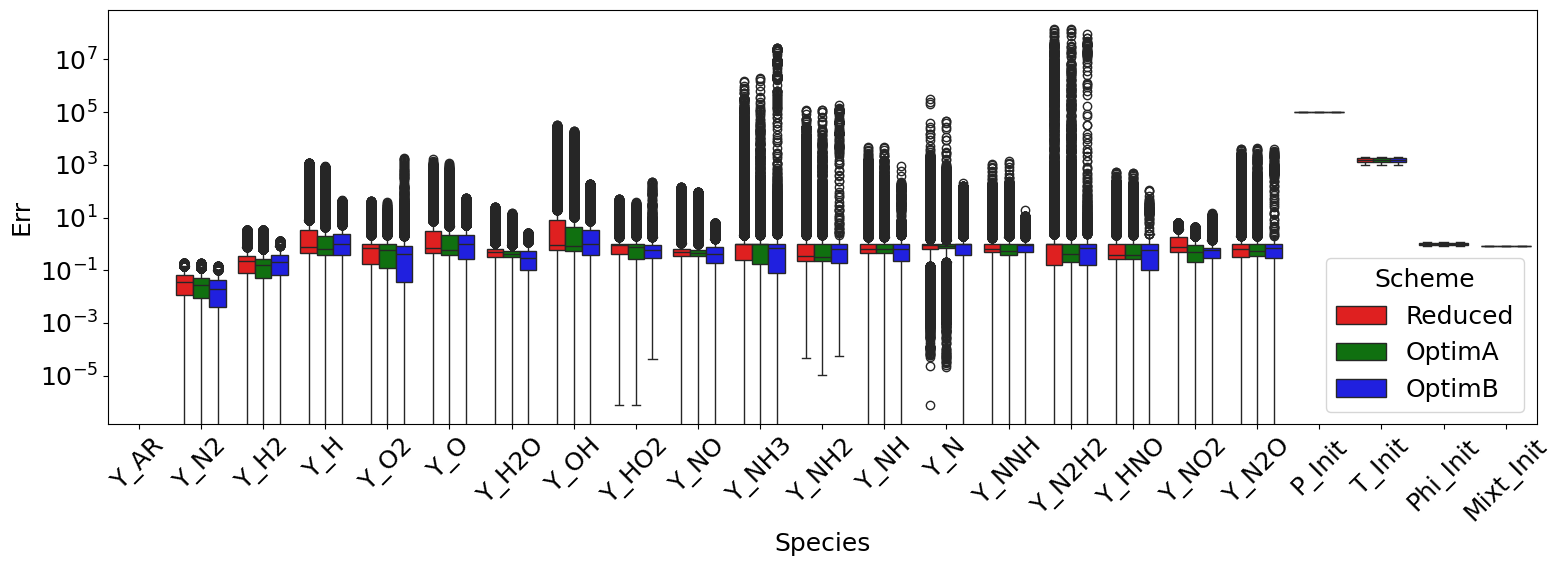

In [5]:
# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Err", hue="Scheme",  palette=palette,showfliers=True)
plt.yscale("log")
# plt.ylim([1e-4, 1e1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ORCH_Err_showfliers.png")

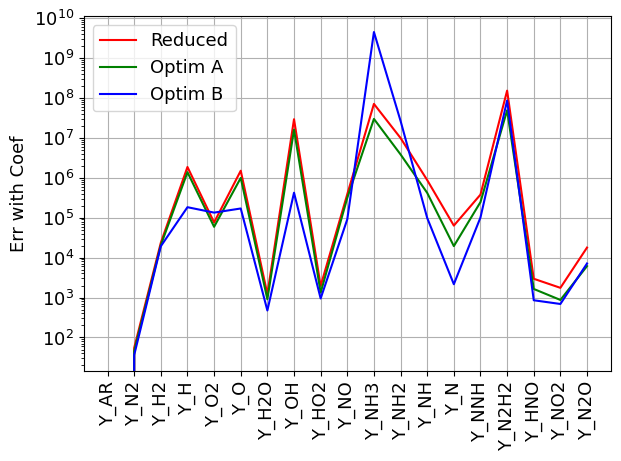

In [9]:
plt.rcParams.update({'font.size': 13})
plt.plot(species, Err_Reduced_Species_Coef, "r-", label="Reduced")
plt.plot(species, Err_OptimA_Species_Coef, "g-", label="Optim A")
plt.plot(species, Err_OptimB_Species_Coef, "b-", label="Optim B")
plt.ylabel("Err with Coef")
plt.xticks(rotation=90)
plt.yscale("log")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("ORCH_Err_Coef.png")


0.8
1000.0
101325.0
0.85


/tmp/ipykernel_214690/2818896483.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Laisse de la place à droite pour la légende


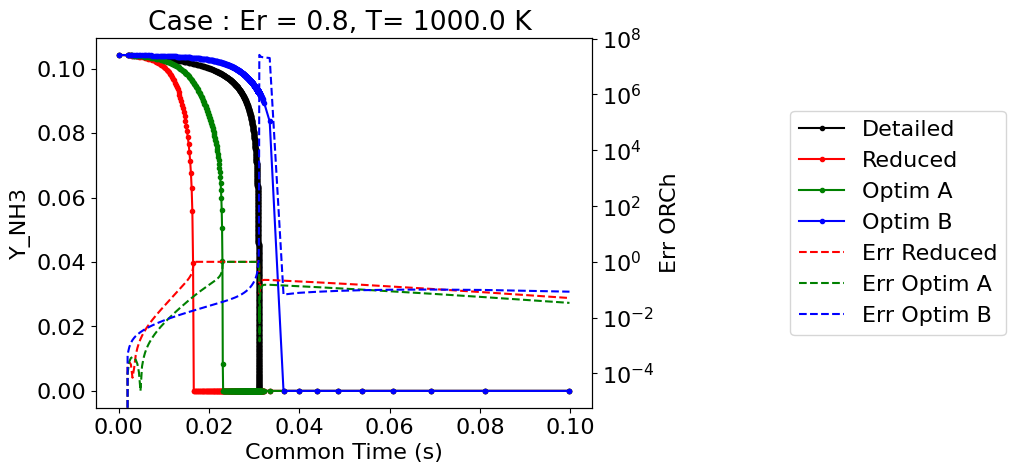

In [33]:
species = "Y_NH3"
# If error is on Optim A : 
if Err_OptimA_Species[species].max() > Err_OptimB_Species[species].max() : 
    er_value = Err_OptimA_Species.loc[Err_OptimA_Species[species].idxmax(), "Phi_Init"]
    t_value  = Err_OptimA_Species.loc[Err_OptimA_Species[species].idxmax(), "T_Init"]
    p_value  = Err_OptimA_Species.loc[Err_OptimA_Species[species].idxmax(), "P_Init"]
    m_value  = Err_OptimA_Species.loc[Err_OptimA_Species[species].idxmax(), "Mixt_Init"]
else : 
# If error is on Optim B : 
    er_value = Err_OptimB_Species.loc[Err_OptimB_Species[species].idxmax(), "Phi_Init"]
    t_value  = Err_OptimB_Species.loc[Err_OptimB_Species[species].idxmax(), "T_Init"]
    p_value  = Err_OptimB_Species.loc[Err_OptimB_Species[species].idxmax(), "P_Init"]
    m_value  = Err_OptimB_Species.loc[Err_OptimB_Species[species].idxmax(), "Mixt_Init"]

print(er_value)
print(t_value)
print(p_value)
print(m_value)

loc_data_d = data_d[(data_d["Phi_Init"]==er_value)&(data_d["T_Init"]==t_value)&(data_d["P_Init"]==p_value)&(data_d["Mixt_Init"]==m_value)]
loc_data_r = data_r[(data_r["Phi_Init"]==er_value)&(data_r["T_Init"]==t_value)&(data_r["P_Init"]==p_value)&(data_r["Mixt_Init"]==m_value)]
loc_data_o = data_o[(data_o["Phi_Init"]==er_value)&(data_o["T_Init"]==t_value)&(data_o["P_Init"]==p_value)&(data_o["Mixt_Init"]==m_value)]
loc_data_ob = data_ob[(data_ob["Phi_Init"]==er_value)&(data_ob["T_Init"]==t_value)&(data_ob["P_Init"]==p_value)&(data_ob["Mixt_Init"]==m_value)]
loc_err_reduced = Err_Reduced_Species[(Err_Reduced_Species["Phi_Init"]==er_value)&(Err_Reduced_Species["T_Init"]==t_value)&(Err_Reduced_Species["P_Init"]==p_value)&(Err_Reduced_Species["Mixt_Init"]==m_value)]
loc_err_optimA = Err_OptimA_Species[(Err_OptimA_Species["Phi_Init"]==er_value)&(Err_OptimA_Species["T_Init"]==t_value)&(Err_OptimA_Species["P_Init"]==p_value)&(Err_OptimA_Species["Mixt_Init"]==m_value)]
loc_err_optimB = Err_OptimB_Species[(Err_OptimB_Species["Phi_Init"]==er_value)&(Err_OptimB_Species["T_Init"]==t_value)&(Err_OptimB_Species["P_Init"]==p_value)&(Err_OptimB_Species["Mixt_Init"]==m_value)]
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots()


# Premier axe pour les concentrations
ax1.plot(loc_data_d["common_grid"], loc_data_d[species], 'k.-', label="Detailed")
ax1.plot(loc_data_d["common_grid"], loc_data_r[species], 'r.-', label="Reduced")
ax1.plot(loc_data_d["common_grid"], loc_data_o[species], 'g.-', label="Optim A")
ax1.plot(loc_data_d["common_grid"], loc_data_ob[species], 'b.-', label="Optim B")
ax1.set_ylabel(f"{species}")
ax1.set_xlabel("Common Time (s)")
# ax1.set_xlim([0,0.0005])


# Deuxième axe pour l'erreur
ax2 = ax1.twinx()
line1, = ax2.plot(loc_data_d["common_grid"], loc_err_reduced[species], 'r--', label="Err Reduced")
line2, = ax2.plot(loc_data_d["common_grid"], loc_err_optimA[species], 'g--', label="Err Optim A")
line2, = ax2.plot(loc_data_d["common_grid"], loc_err_optimB[species], 'b--', label="Err Optim B")
ax2.set_ylabel("Err ORCh")
ax2.tick_params(axis='y')
ax2.set_yscale("log")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2,
           loc='center left', bbox_to_anchor=(1.4, 0.5), borderaxespad=0.)

plt.title(f"Case : Er = {er_value}, T= {t_value} K ")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Laisse de la place à droite pour la légende
plt.savefig(f"ORCH_Err_{species}.png", bbox_inches='tight')